# Model

## Libraries

In [10]:
import pathlib

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from PIL import Image

import chess

## Constants

In [3]:
DATA_DIR = pathlib.Path.cwd().parent / "data" / "deepconvchess-dataset" / "dataset"

## Create TensorFlow Dataset

### Crop Each Image To 64 Partitions

In [4]:
# Dataset
X = []
y = []

for file in DATA_DIR.iterdir():
    if file.is_file() and file.name.endswith(".jpeg"):
        print("Processing %s" % file.name)

        fen = file.name.split(".")[0]
        fen = fen.replace("_", "/")
        board = chess.Board(fen)
        
        # Open image of Chess board
        img = Image.open(DATA_DIR / file.name)
        IMG_WIDTH, IMG_HEIGHT = img.size

        # Crop each image into 64 sections, one for each tile on the board
        for i in range(8):
            for j in range(8):
                crop_x = j * IMG_WIDTH // 8
                crop_y = i * IMG_HEIGHT // 8
                img_crop = img.crop((crop_x, crop_y, crop_x + IMG_WIDTH // 8, crop_y + IMG_HEIGHT // 8))

                piece = board.piece_at(((7 - i) * 8) + j) or "_"
                X.append(np.array(img_crop))
                y.append(piece)

Processing 1N2r3_2q1ppkp_1p1p1np1_p1nP4_2P2P2_1P4P1_P2Q2BP_3RR1K1 b - - 0 21.jpeg
Processing 1q2r3_4ppkp_1p1p1np1_p1nP4_2P2P2_1P4P1_P2Q2BP_3RR1K1 w - - 0 22.jpeg
Processing 1q2r3_4ppkp_1p1p1np1_p1nP4_2PQ1P2_1P4P1_P5BP_3RR1K1 b - - 1 22.jpeg
Processing 1r1q1rk1_1ppb1pbp_p1np1np1_8_2PNP3_2N1BP2_PP1QB1PP_R4RK1 w - - 6 12.jpeg
Processing 1r1Q2k1_5ppp_2q1p3_1p6_2p2P2_P3P3_1Q4PP_1R4K1 b - - 0 27.jpeg
Processing 1r1qr3_1b1nppkp_pp1p2p1_2n5_2PNP3_1PN3P1_P2Q1PBP_3RR1K1 w - - 2 17.jpeg
Processing 1r1qr3_1b1nppkp_pp1p2p1_2n5_2PNPP2_1PN3P1_P2Q2BP_3RR1K1 b - - 0 17.jpeg
Processing 1r1qr3_1b2ppkp_pp1p1np1_2n5_2PNP3_1PN3P1_P2Q1PBP_3RR1K1 b - - 1 16.jpeg
Processing 1r1qr3_1b2ppkp_pp1p1np1_2n5_2PNP3_1PN3P1_P2Q1PBP_R3R1K1 w - - 0 16.jpeg
Processing 1r1qr3_pb2ppkp_1p1p1np1_2n5_2PNP3_1PN3P1_P2Q1PBP_R3R1K1 b - - 0 15.jpeg
Processing 1r1qr3_pb2ppkp_1p1p1np1_2n5_2PNP3_2N3P1_PP1Q1PBP_R3R1K1 w - - 3 15.jpeg
Processing 1r2r3_1bqnppkp_pp1p2p1_2n5_2PNPP2_1PN3P1_P2Q2BP_3RR1K1 w - - 1 18.jpeg
Processing 1r2r3_1bqnp

In [5]:
len(X)

30208

In [6]:
X = np.array(X)
y = np.array(y)

### Display Example Cropped Board

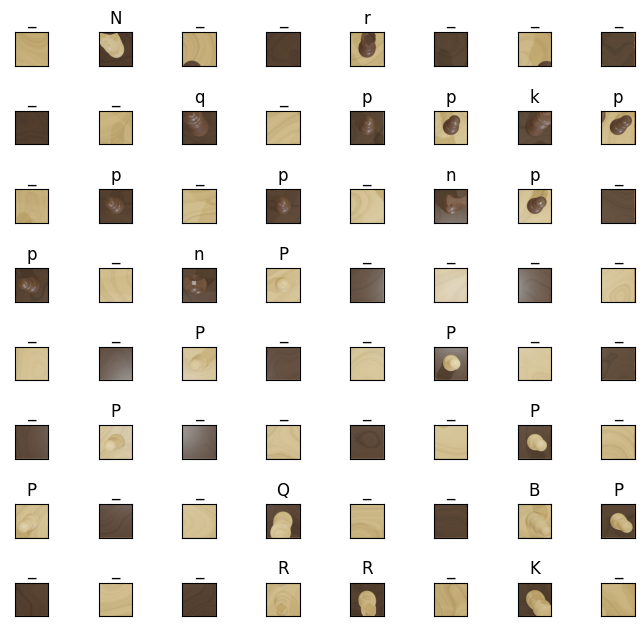

In [9]:
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(wspace=1.5)

for i in range(0, 64):
    fig.add_subplot(8, 8, i + 1)
    plt.imshow(X[i])
    plt.title(y[i])
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

## Test and Train Split

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Print the shapes of the resulting datasets
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))

X_train shape: (24166, 160, 160, 3)
y_train shape: (24166,)
X_test shape: (6042, 160, 160, 3)
y_test shape: (6042,)
